In [1]:
import pandas as pd

In [6]:
path = "gs://dsgt-clef-fungiclef-2024/production/metadata/DF_combined_metadata_mapped_columns.csv"

In [7]:
meta = pd.read_csv(path)

In [9]:
meta.groupby('dataset').count()

,observationID,month,day,countryCode,locality,level0Gid,level0Name,level1Gid,level1Name,level2Gid,...,Substrate_text,Habitat_text,MetaSubstrate_text,kingdom_text,phylum_text,class_text,order_text,family_text,genus_text,species_text
dataset,,,,,,,,,,,,,,,,,,,,,
test,19746,19746,19746,19746,19746,19746,19661,19746,19661,19746,...,19635,19743,19742,19746,19746,19727,19686,19576,19746,19746
train,315332,315315,315315,315332,315332,315332,314074,315332,314074,315332,...,285248,314237,313804,315332,315332,315291,315104,312563,315332,315300
valid,19788,19788,19788,19788,19788,19788,19738,19788,19738,19788,...,19674,19779,19786,19788,19788,19771,19734,19670,19788,19788


In [34]:
import seaborn as sns

In [38]:
data = meta.groupby('class_id').count()['observationID']
data

class_id
0         365
1         215
2          68
3          50
4         583
        ...  
1600       73
1601       71
1602      621
1603      412
1604    21954
Name: observationID, Length: 1605, dtype: int64

<Axes: xlabel='class_id', ylabel='observationID'>

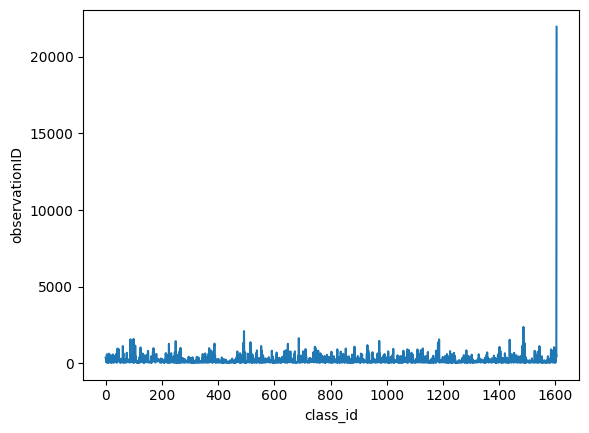

In [40]:
sns.lineplot(data)

In [43]:
min(data)

31

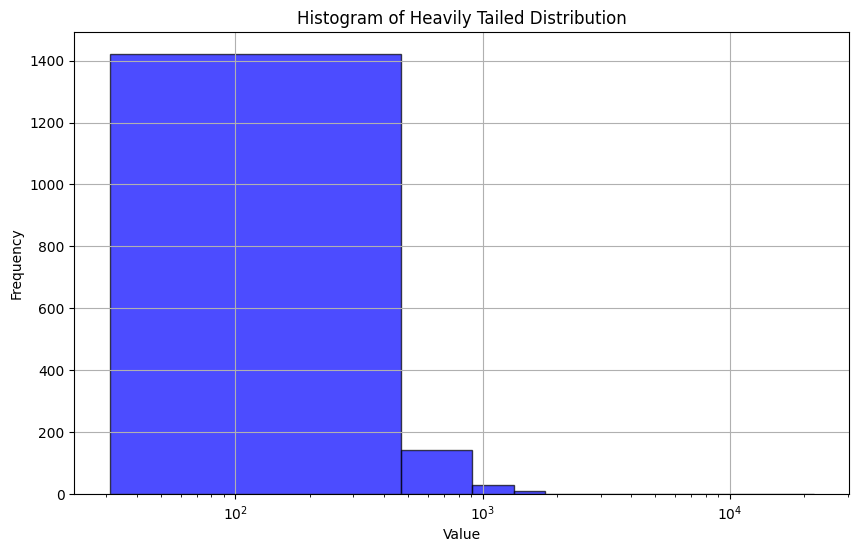

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Example data

# Set the number of bins


plt.figure(figsize=(10, 6))
plt.hist(x=data, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')  # Use logarithmic scale if using logarithmic bins
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Heavily Tailed Distribution')
plt.grid(True)  # Optional: add grid lines for better readability
plt.show()


In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Example data

# Set the number of bins
hist, bins, _ = plt.hist(data, bins=50)
plt.close()

# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


bins = np.logspace(np.log10(min(data)), np.log10(max(data)), 50)  # Logarithmic bins

plt.figure(figsize=(10, 6))
plt.hist(data, bins=logbins, edgecolor='grey', alpha=0.99)
plt.xscale('log')  # Use logarithmic scale if using logarithmic bins
plt.xlabel('Log of Class IDs')
plt.ylabel('Log Frequency of Class Observations')
plt.grid(True)  # Optional: add grid lines for better readability
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'patch'

<Figure size 1000x600 with 0 Axes>

# dino

In [17]:
dino_train_path = "gs://dsgt-clef-fungiclef-2024/production/dino_cls/DF_300_train.parquet"

In [18]:
dino = pd.read_parquet(dino_train_path)

In [28]:
dino.shape

(311449, 25)

In [27]:
dino['embedding'][0].shape

(768,)

ResNet

In [20]:
resnet_train = "gs://dsgt-clef-fungiclef-2024/production/resnet/DF_300_train.parquet"

resnet = pd.read_parquet(resnet_train)

In [21]:
resnet.shape

(315332, 25)